In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ML1_uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Preprocessing

In [4]:
# Removing nulll values
df = df.dropna()

# Null values
display(df.isna().sum())

# Removing invalid latitudes and longitudes
outliers = df[
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)
]
print("\n\nOutliers")
display(outliers)
display(df.shape)


df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]
df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]

# Checking for invalid values
outliers = df[
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180)
]
display(outliers)
display(df.shape)

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64



Outliers


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4949,42931506,2012-04-28 00:58:00.000000235,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957,-74.003570,40.734192,1
32549,5634081,2012-06-16 10:04:00.00000061,15.7,2012-06-16 10:04:00 UTC,-74.016055,40.715155,-737.916665,40.697862,2
48506,1055960,2011-11-05 23:26:00.000000309,33.7,2011-11-05 23:26:00 UTC,-735.200000,40.770092,-73.980187,40.765530,1
56617,14257861,2012-03-11 07:24:00.00000031,8.1,2012-03-11 07:24:00 UTC,-73.960828,404.433332,-73.988357,40.769037,1
61793,2849369,2012-06-13 05:45:00.0000006,8.5,2012-06-13 05:45:00 UTC,-73.951385,401.066667,-73.982110,40.754117,1
75851,33249845,2011-11-05 00:22:00.00000051,15.7,2011-11-05 00:22:00 UTC,-1340.648410,1644.421482,-3356.666300,872.697628,1
91422,23566642,2011-05-18 13:24:00.000000213,16.1,2011-05-18 13:24:00 UTC,57.418457,1292.016128,1153.572603,-881.985513,1
103745,16826862,2011-10-14 19:04:00.000000202,12.9,2011-10-14 19:04:00 UTC,-736.216667,40.767035,-73.982377,40.725562,1
139447,39981694,2012-01-20 11:50:00.00000088,13.7,2012-01-20 11:50:00 UTC,-74.011042,40.709780,-73.983163,493.533332,4
144253,9421322,2009-08-26 11:55:00.00000023,7.3,2009-08-26 11:55:00 UTC,-768.550000,40.757812,-73.997040,40.740007,1


(199999, 9)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


(199987, 9)

In [5]:
# Adding distance column
# x1, x2 - pickup and dropoff latitudes
# y1, y2 - pickup and drop of longitudes
x1 = df['pickup_latitude'] * np.pi/180
x2 = df['dropoff_latitude'] * np.pi/180
y1 = df['pickup_longitude'] * np.pi/180
y2 = df['dropoff_longitude'] * np.pi/180
dist_lat = x2-x1
dist_long = y2-y1
r = 6371.0

a = np.sin(dist_lat/2)**2 + np.cos(x1) * np.cos(x2) * np.sin(dist_long/2)**2
ans = 2 * r * np.arctan2(np.sqrt(a), np.sqrt(1-a))

df['distance'] = ans
df = df[(df['distance'] > 0) & (df['fare_amount'] > 0)]
df




,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


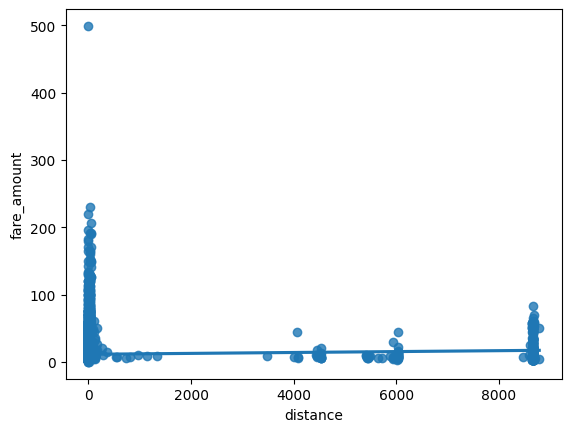

In [6]:
sns.regplot(x='distance', y='fare_amount', data=df)
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

In [7]:
# We get many outliers, thus we remove thm again

# Removing outliers again
df.drop(df[df['distance'] >= 60].index, inplace=True)
df.drop(df[df['fare_amount'] <= 0].index, inplace=True)
df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index, inplace=True)

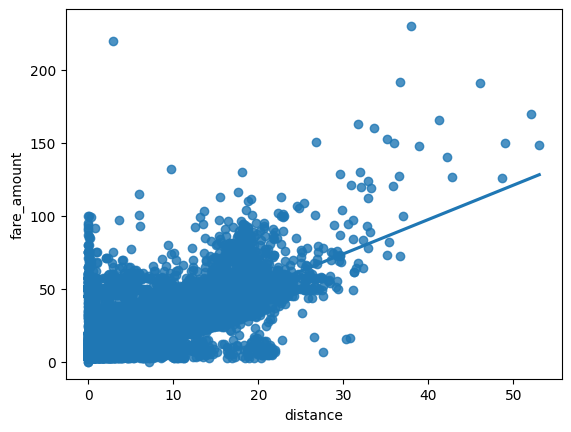

In [8]:
sns.regplot(x='distance', y='fare_amount', data=df)
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
Unnamed: 0,1.000000,0.000079,-0.000424,0.000230,-0.000371,0.000219,0.002795,-0.000462
fare_amount,0.000079,1.000000,0.011970,-0.008808,0.010464,-0.008621,0.012948,0.885141
pickup_longitude,-0.000424,0.011970,1.000000,-0.994006,0.999883,-0.993974,0.009175,0.005357
pickup_latitude,0.000230,-0.008808,-0.994006,1.000000,-0.993994,0.999928,-0.009306,-0.002835
dropoff_longitude,-0.000371,0.010464,0.999883,-0.993994,1.000000,-0.993961,0.009169,0.004427
dropoff_latitude,0.000219,-0.008621,-0.993974,0.999928,-0.993961,1.000000,-0.009266,-0.002152
passenger_count,0.002795,0.012948,0.009175,-0.009306,0.009169,-0.009266,1.000000,0.007770
distance,-0.000462,0.885141,0.005357,-0.002835,0.004427,-0.002152,0.007770,1.000000


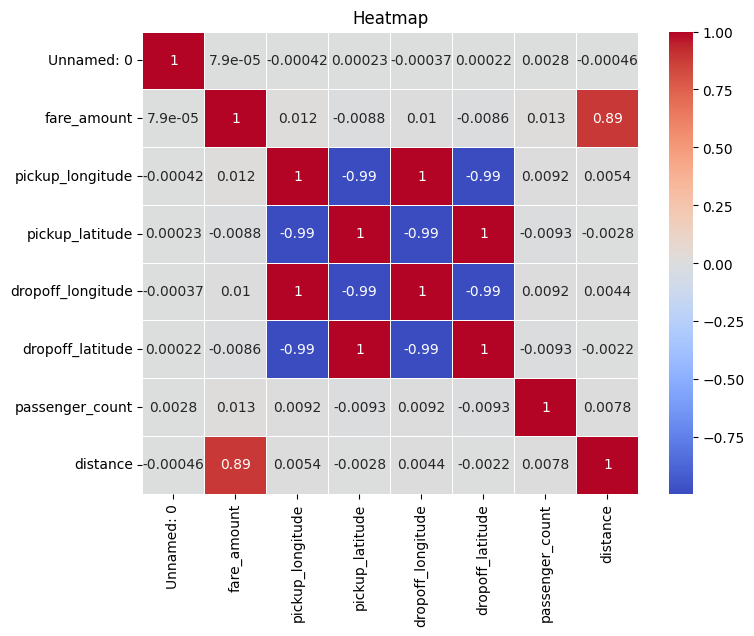

In [9]:
num_df = df.select_dtypes(include=['number'])

corr = num_df.corr()
display(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Heatmap")
plt.show()

In [10]:
# Regressions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


X = df[['distance']]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("Root mean squared error:", root_mean_squared_error(y_true, y_pred))

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Results:
R² Score: 0.7882902147332442
MSE: 19.791247913259397
MAE: 2.34718836352532
Root mean squared error: 4.4487355409441225

Random Forest Results:
R² Score: 0.7052614776346295
MSE: 27.553016306595687
MAE: 2.8661144047404084
Root mean squared error: 5.249096713397048
